<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-Likhitha/Copy_of_Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize data
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

# Reshape for data augmentation (need 4D shape: (samples, height, width, channels))
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Define a Simple Neural Network
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

In [ ]:
# Train the Model
from tensorflow.keras import Input, Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(28, 28, 1)),       # ✅ Proper Input layer
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])



In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=10,
    validation_data=(x_test, y_test)
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.5588 - loss: 1.1644 - val_accuracy: 0.7486 - val_loss: 0.6283
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7132 - loss: 0.7425 - val_accuracy: 0.7963 - val_loss: 0.5664
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.7297 - loss: 0.6995 - val_accuracy: 0.7821 - val_loss: 0.5477
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.7424 - loss: 0.6738 - val_accuracy: 0.7808 - val_loss: 0.5502
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.7455 - loss: 0.6554 - val_accuracy: 0.8033 - val_loss: 0.5221
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7522 - loss: 0.6485 - val_accuracy: 0.8165 - val_loss: 0.4952
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.7625 - loss: 0.6244 - val_accuracy: 0.8129 - val_loss: 0.5080
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7667 - loss: 0.6170 - val_accurac

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n🎯 Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8171 - loss: 0.4743

🎯 Test accuracy: 0.8172


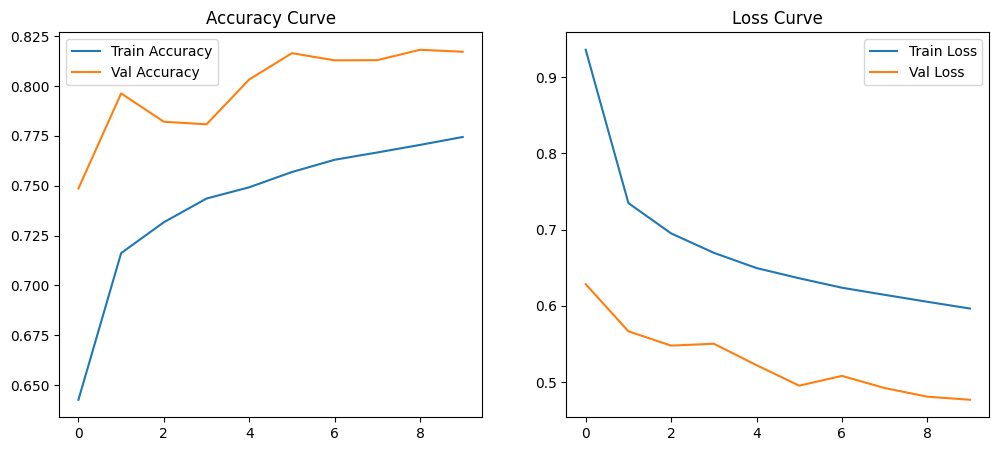

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend(); plt.title('Accuracy Curve')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Loss Curve')

plt.show()


In [ ]:
predictions = model.predict(x_test[:5])
for i, pred in enumerate(predictions):
    print(f"Image {i}: predicted {np.argmax(pred)}, actual {y_test[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Image 0: predicted 9, actual 9
Image 1: predicted 2, actual 2
Image 2: predicted 1, actual 1
Image 3: predicted 1, actual 1
Image 4: predicted 6, actual 6


# Extension Ideas
	•	Increase Complexity: Add additional hidden layers or change activation functions.
	•	Data Augmentation: Use `tf.keras.preprocessing.image.ImageDataGenerator` to augment training data.
	•	Different Dataset: Swap MNIST for Fashion-MNIST by replacing `tf.keras.datasets.mnist` with `fashion_mnist`.
	•	Visualization: Plot training and validation accuracy/loss curves:

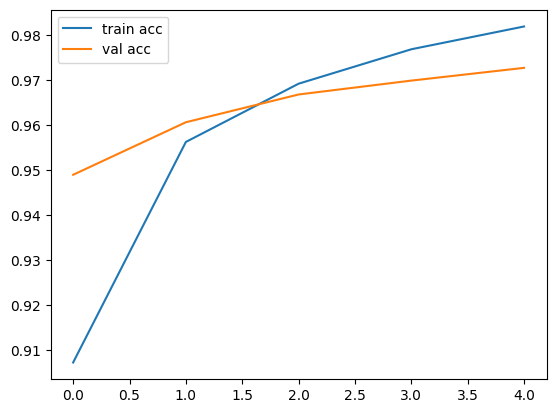

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# Deliverables
	•	A working Colab notebook with all cells executed.
	•	Screenshots or printout of:
	•	Model summary.
	•	Training/validation accuracy curves.
	•	Final test accuracy.
	•	Sample predictions on test images.